## ALY 6020 - Understanding Baby Health ##

### Data Loading and Cleaning ###

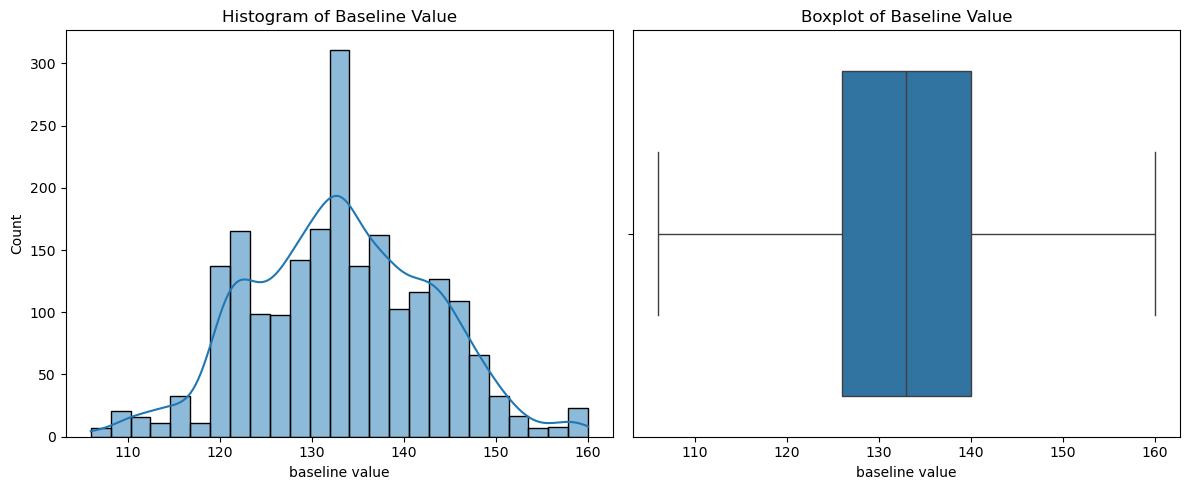

Skewness of 'baseline value': 0.03


In [115]:
# --- 4. Visualize Distribution of 'baseline value' ---
# Create histogram and boxplot to assess distribution and potential outliers
plt.figure(figsize=(12, 5))

# Histogram with KDE (density curve)
plt.subplot(1, 2, 1)
sns.histplot(df['baseline value'], kde=True)
plt.title('Histogram of Baseline Value')

# Boxplot to visualize outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['baseline value'])
plt.title('Boxplot of Baseline Value')

plt.tight_layout()
plt.show()

# Calculate skewness to assess symmetry of the distribution
skewness = df['baseline value'].skew()
print(f"Skewness of 'baseline value': {skewness:.2f}")

In [117]:
# --- 5. Handle Missing Values in 'baseline value' ---

# Calculate the mean of the 'baseline value' column
# This is appropriate because the distribution is nearly symmetric (low skewness)
mean_baseline = df['baseline value'].mean()

# Impute missing values with the mean
df['baseline value'].fillna(mean_baseline, inplace=True)

# Confirm that missing values have been filled
print("Missing values in 'baseline value' handled using mean imputation.")


Missing values in 'baseline value' handled using mean imputation.


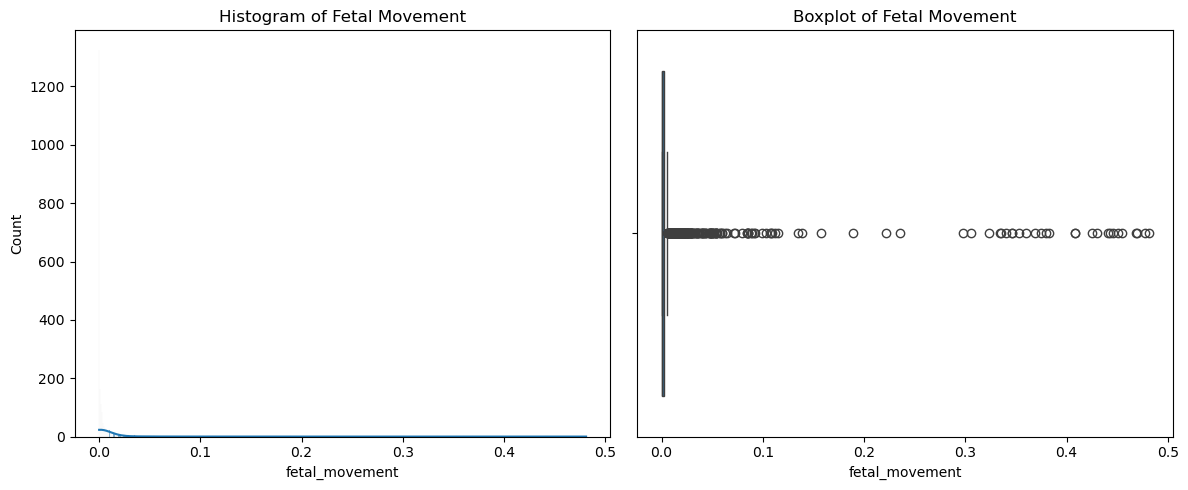

Skewness of 'fetal_movement': 7.83


In [119]:
# --- 6. Visualize and Impute 'fetal_movement' ---

# Plot histogram and boxplot to assess the distribution and outliers
plt.figure(figsize=(12, 5))

# Histogram with KDE for distribution shape
plt.subplot(1, 2, 1)
sns.histplot(df['fetal_movement'], kde=True)
plt.title('Histogram of Fetal Movement')

# Boxplot to identify outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['fetal_movement'])
plt.title('Boxplot of Fetal Movement')

plt.tight_layout()
plt.show()

# Calculate skewness to understand asymmetry
skewness = df['fetal_movement'].skew()
print(f"Skewness of 'fetal_movement': {skewness:.2f}")


In [120]:
# Use median for imputation due to high skewness and outliers
median_fm = df['fetal_movement'].median()
df['fetal_movement'].fillna(median_fm, inplace=True)

print("Missing values in 'fetal_movement' handled using median imputation.")


Missing values in 'fetal_movement' handled using median imputation.


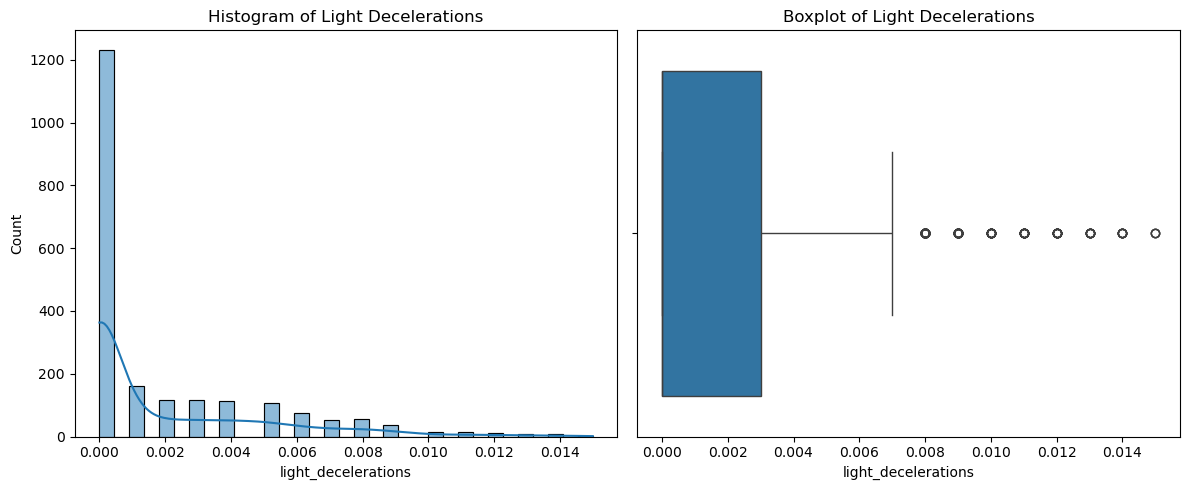

Skewness of 'light_decelerations': 1.72


In [123]:
# --- 7. Visualize and Impute 'light_decelerations' ---

# Plot distribution and outliers for 'light_decelerations'
plt.figure(figsize=(12, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['light_decelerations'], kde=True)
plt.title('Histogram of Light Decelerations')

# Boxplot to visualize extreme values
plt.subplot(1, 2, 2)
sns.boxplot(x=df['light_decelerations'])
plt.title('Boxplot of Light Decelerations')

plt.tight_layout()
plt.show()

# Check skewness to decide imputation method
skewness = df['light_decelerations'].skew()
print(f"Skewness of 'light_decelerations': {skewness:.2f}")

In [125]:
# Use median imputation due to moderate skewness and presence of outliers
median_ld = df['light_decelerations'].median()
df['light_decelerations'].fillna(median_ld, inplace=True)

print("Missing values in 'light_decelerations' handled using median imputation.")

Missing values in 'light_decelerations' handled using median imputation.


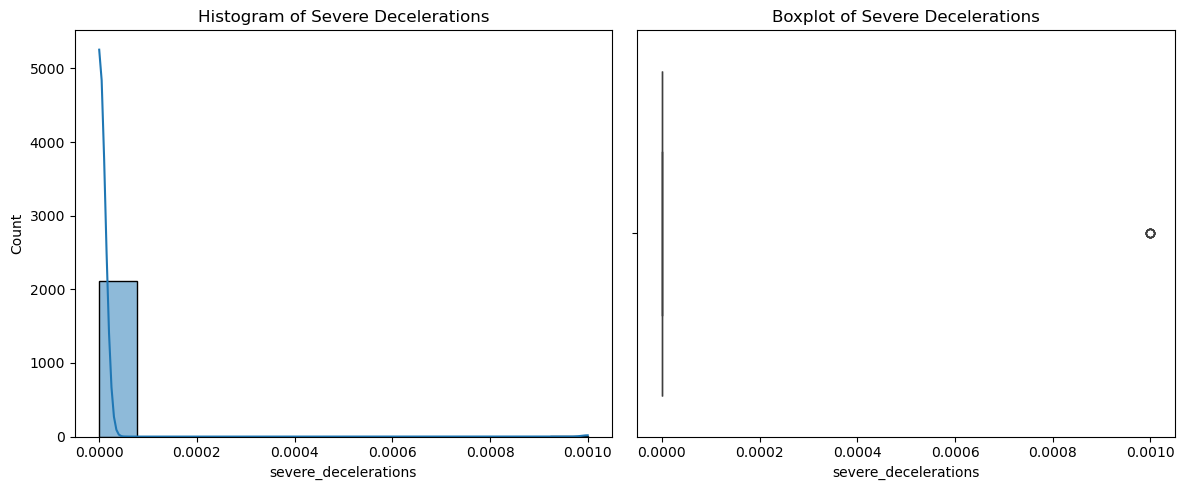

Skewness of 'severe_decelerations': 17.35


In [127]:
# --- 8. Visualize and Impute 'severe_decelerations' ---

# Plot distribution and detect rare events in 'severe_decelerations'
plt.figure(figsize=(12, 5))

# Histogram with KDE to assess distribution shape
plt.subplot(1, 2, 1)
sns.histplot(df['severe_decelerations'], kde=True)
plt.title('Histogram of Severe Decelerations')

# Boxplot to check for rare, high-value events
plt.subplot(1, 2, 2)
sns.boxplot(x=df['severe_decelerations'])
plt.title('Boxplot of Severe Decelerations')

plt.tight_layout()
plt.show()

# Calculate skewness to confirm sparsity
skewness = df['severe_decelerations'].skew()
print(f"Skewness of 'severe_decelerations': {skewness:.2f}")

In [129]:
# Impute missing values with 0 because the event is rare and most values are zero
df['severe_decelerations'].fillna(0, inplace=True)

print("Missing values in 'severe_decelerations' handled by filling with 0.")

Missing values in 'severe_decelerations' handled by filling with 0.


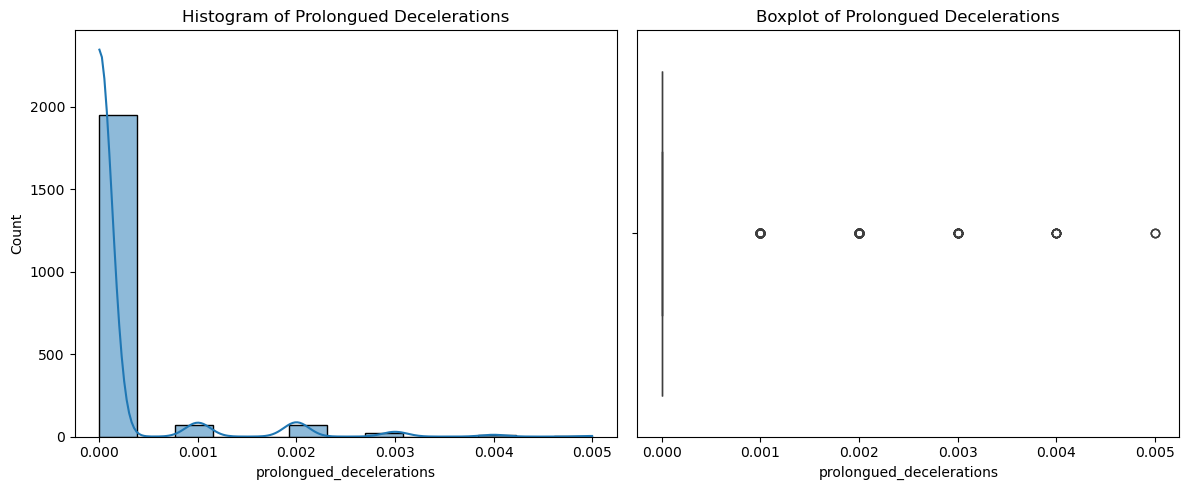

Skewness of 'prolongued_decelerations': 4.32


In [131]:
# --- 9. Visualize and Impute 'prolongued_decelerations' ---

# Plot histogram and boxplot to assess rarity and outliers
plt.figure(figsize=(12, 5))

# Histogram with KDE curve
plt.subplot(1, 2, 1)
sns.histplot(df['prolongued_decelerations'], kde=True)
plt.title('Histogram of Prolongued Decelerations')

# Boxplot to highlight rare, high values
plt.subplot(1, 2, 2)
sns.boxplot(x=df['prolongued_decelerations'])
plt.title('Boxplot of Prolongued Decelerations')

plt.tight_layout()
plt.show()

# Check skewness to confirm extreme right-skew
skewness = df['prolongued_decelerations'].skew()
print(f"Skewness of 'prolongued_decelerations': {skewness:.2f}")

In [133]:
# Impute missing values with 0 since most values represent absence of deceleration
df['prolongued_decelerations'].fillna(0, inplace=True)

print("Missing values in 'prolongued_decelerations' handled by filling with 0.")

Missing values in 'prolongued_decelerations' handled by filling with 0.


In [135]:
# Check for any remaining missing values in the dataset
missing_summary = df.isnull().sum()
print("🔍 Missing Values After Imputation:")
print(missing_summary[missing_summary > 0])


🔍 Missing Values After Imputation:
Series([], dtype: int64)


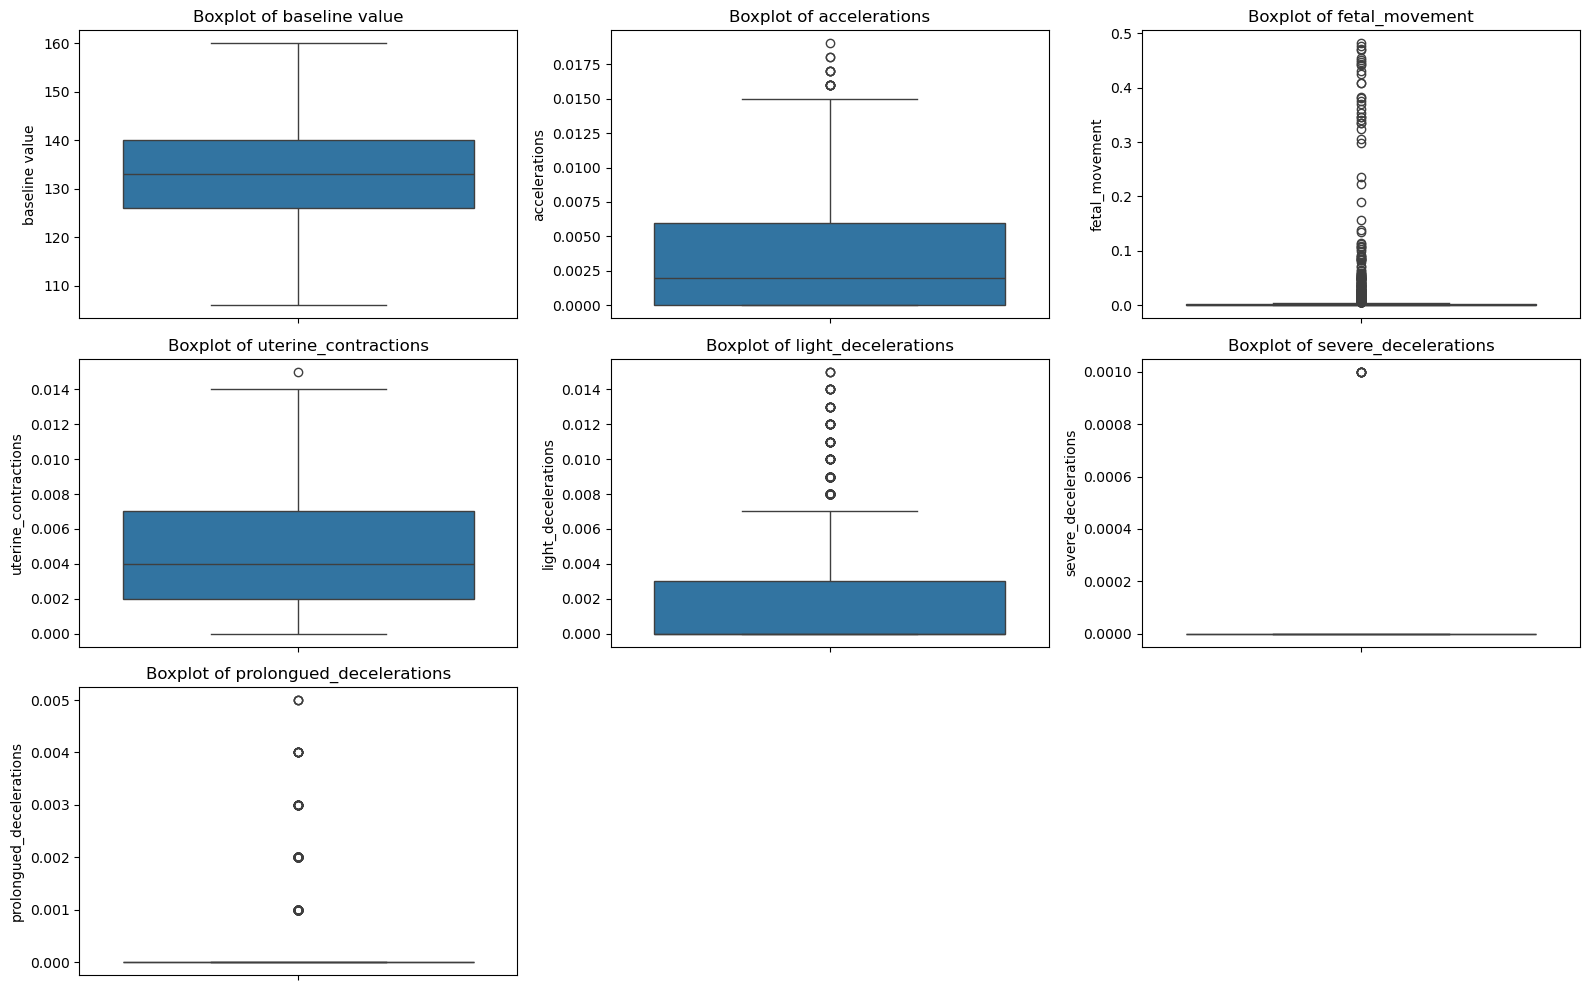

In [137]:
# --- 10. Visualize Outliers Across Key Numerical Features ---

# Define list of continuous features to inspect for outliers
features = [
    'baseline value', 'accelerations', 'fetal_movement',
    'uterine_contractions', 'light_decelerations',
    'severe_decelerations', 'prolongued_decelerations'
]

# Generate boxplots for each feature to visualize spread and detect potential outliers
plt.figure(figsize=(16, 10))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [139]:
# --- 11. Encode 'fetal_health' for Binary Classification ---

# Recode the 'fetal_health' column:
# 1 → normal (keep as 1)
# 2 or 3 → suspect or pathological → combine as 0 (not normal)
df['fetal_health'] = df['fetal_health'].apply(lambda x: 1 if x == 1 else 0)

# Display the distribution of encoded values
print("Encoded fetal_health value counts:")
print(df['fetal_health'].value_counts())


Encoded fetal_health value counts:
0    1655
1     471
Name: fetal_health, dtype: int64


### Variable Selection ###

In [142]:
# --- 12. Standardize Feature Values for KNN ---

from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Apply standardization: center to mean 0, scale to standard deviation 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame with original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("All features scaled successfully.")


All features scaled successfully.


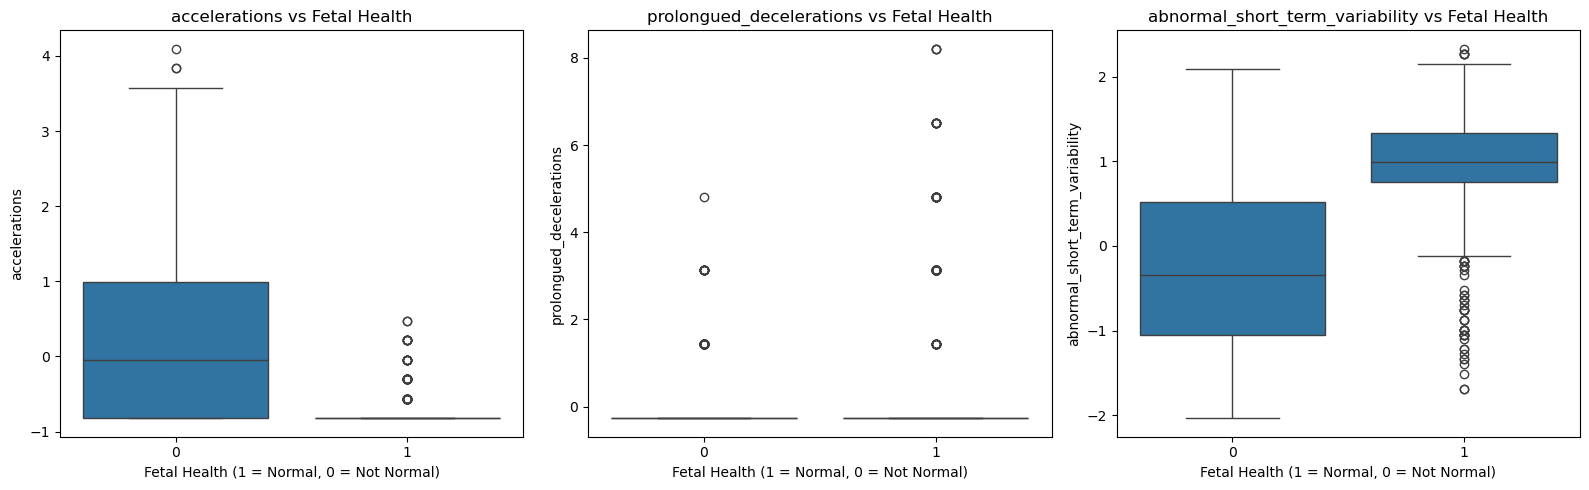

In [144]:
# --- 13. Visualize Relationships Between Selected Features and Fetal Health ---

# Temporarily add the target variable back to the scaled feature DataFrame for visualization
X_scaled['fetal_health'] = y

# Define the final selected features based on clinical and statistical reasoning
selected_features = ['accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability']

# Create boxplots for each selected feature to compare distributions across fetal health classes
plt.figure(figsize=(16, 5))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='fetal_health', y=feature, data=X_scaled)
    plt.title(f'{feature} vs Fetal Health')
    plt.xlabel('Fetal Health (1 = Normal, 0 = Not Normal)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


### K Value Selection ###

In [147]:
# --- 14. KNN Model Training and Evaluation for K = 5 ---

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Initialize KNN classifier with K = 5
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Fit the model on training data
knn_5.fit(X_train, y_train)

# Predict on the test set
y_pred_5 = knn_5.predict(X_test)

# Print confusion matrix
print("Confusion Matrix (K=5):")
print(confusion_matrix(y_test, y_pred_5))

# Print accuracy score
acc_5 = accuracy_score(y_test, y_pred_5)
print(f"\nAccuracy (K=5): {acc_5:.4f}")

# Print detailed classification report (precision, recall, F1-score)
print("\nClassification Report (K=5):")
print(classification_report(y_test, y_pred_5, target_names=['Not Normal (0)', 'Normal (1)']))


Confusion Matrix (K=5):
[[306  27]
 [ 21  72]]

Accuracy (K=5): 0.8873

Classification Report (K=5):
                precision    recall  f1-score   support

Not Normal (0)       0.94      0.92      0.93       333
    Normal (1)       0.73      0.77      0.75        93

      accuracy                           0.89       426
     macro avg       0.83      0.85      0.84       426
  weighted avg       0.89      0.89      0.89       426



In [149]:
# --- 15. KNN Model Training and Evaluation for K = 15 ---

# Initialize KNN classifier with K = 15
knn_15 = KNeighborsClassifier(n_neighbors=15)

# Train the model using training data
knn_15.fit(X_train, y_train)

# Predict on the test data
y_pred_15 = knn_15.predict(X_test)

# Display the confusion matrix
print("Confusion Matrix (K=15):")
print(confusion_matrix(y_test, y_pred_15))

# Compute and display accuracy
acc_15 = accuracy_score(y_test, y_pred_15)
print(f"\nAccuracy (K=15): {acc_15:.4f}")

# Show detailed classification metrics
print("\nClassification Report (K=15):")
print(classification_report(y_test, y_pred_15, target_names=['Not Normal (0)', 'Normal (1)']))


Confusion Matrix (K=15):
[[310  23]
 [ 24  69]]

Accuracy (K=15): 0.8897

Classification Report (K=15):
                precision    recall  f1-score   support

Not Normal (0)       0.93      0.93      0.93       333
    Normal (1)       0.75      0.74      0.75        93

      accuracy                           0.89       426
     macro avg       0.84      0.84      0.84       426
  weighted avg       0.89      0.89      0.89       426



In [151]:
# --- 16. KNN Model Training and Evaluation for K = 30 ---

# Initialize KNN classifier with K = 30
knn_30 = KNeighborsClassifier(n_neighbors=30)

# Train the model using training data
knn_30.fit(X_train, y_train)

# Predict fetal health on the test set
y_pred_30 = knn_30.predict(X_test)

# Display confusion matrix
print("Confusion Matrix (K=30):")
print(confusion_matrix(y_test, y_pred_30))

# Calculate and print accuracy
acc_30 = accuracy_score(y_test, y_pred_30)
print(f"\nAccuracy (K=30): {acc_30:.4f}")

# Print classification metrics (precision, recall, F1-score)
print("\nClassification Report (K=30):")
print(classification_report(y_test, y_pred_30, target_names=['Not Normal (0)', 'Normal (1)']))


Confusion Matrix (K=30):
[[306  27]
 [ 22  71]]

Accuracy (K=30): 0.8850

Classification Report (K=30):
                precision    recall  f1-score   support

Not Normal (0)       0.93      0.92      0.93       333
    Normal (1)       0.72      0.76      0.74        93

      accuracy                           0.88       426
     macro avg       0.83      0.84      0.83       426
  weighted avg       0.89      0.88      0.89       426

